In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

sb.set_style('darkgrid')

In [2]:
data = pd.read_csv('training_tweets_for_EDA.csv')

### Locations

In [3]:
locations = data[['geo_location', 'user_described_location']]

**General stats**

In [28]:
locations.describe()

,geo_location,user_described_location
count,128143,114433
unique,1494,8547
top,"Manhattan, NY","New York, NY"
freq,37635,12726


**Top-10 geo loactions**

In [31]:
top_geo_loc = locations.groupby('geo_location').count().nlargest(10, columns='user_described_location')
top_geo_loc

,user_described_location
geo_location,
"Manhattan, NY",33865
"Brooklyn, NY",22061
"Queens, NY",12890
"New York, USA",8828
"Bronx, NY",7483
"New Jersey, USA",3095
"Staten Island, NY",2493
"Newark, NJ",2088
"Jersey City, NJ",1662


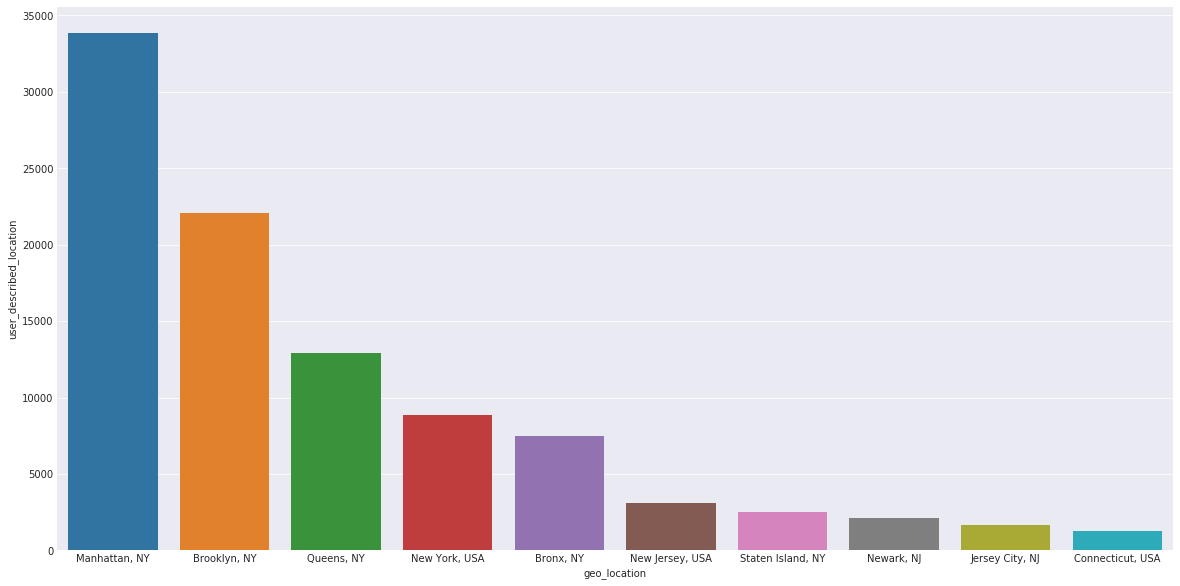

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sb.barplot(x='geo_location', y='user_described_location', data=top_geo_loc.reset_index(), ax=ax)

**Top-10 user described locations**

In [32]:
top_user_geo_loc = locations.groupby('user_described_location').count().nlargest(10, columns='geo_location')
top_user_geo_loc

,geo_location
user_described_location,
"New York, NY",12726
"Brooklyn, NY",9040
New York City,4417
NYC,3930
"New York, USA",3303
New York State,2806
"Queens, NY",2580
"Manhattan, NY",2542
New York,2504


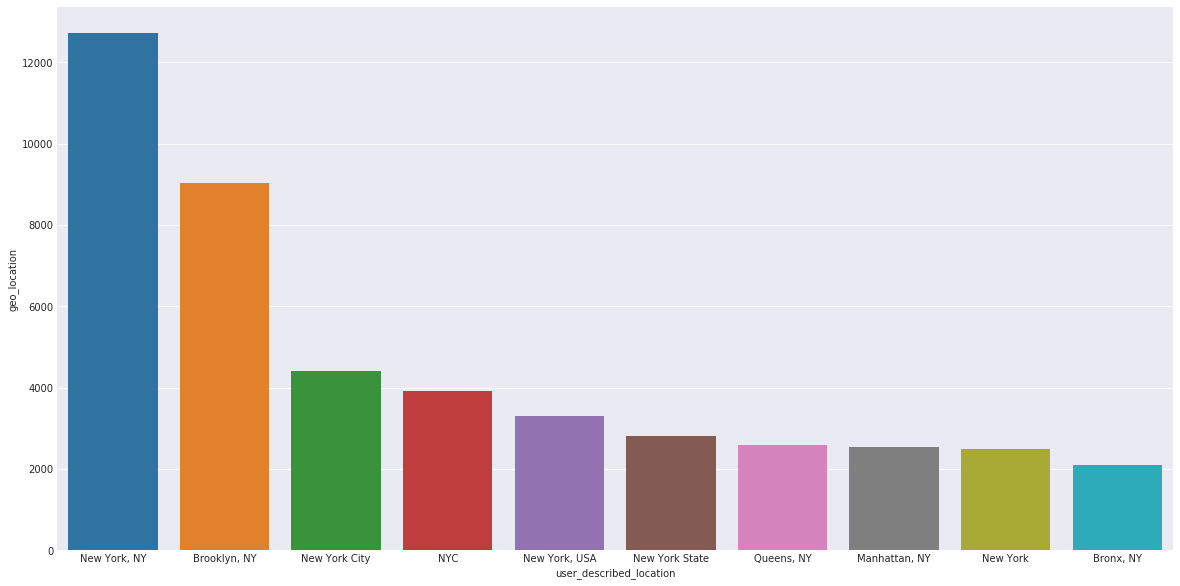

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))
_ = sb.barplot(x='user_described_location', y='geo_location', data=top_user_geo_loc.reset_index(), ax=ax)

### Tweets content

**Ideally we want to find some useful info about financial activity. Firstly, lets inspect tweets word cloud and try to spot some finance related words.**

In [45]:
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud
import re


def text_preprocessing(text):
    text = re.sub(r'&\S{,140}', '', text)
    text = re.sub(r'@\S{,140}', '', text)
    text = re.sub(r'#\S{,140}', '', text)
    text = re.sub(r'http://\S{,140}', '', text)
    text = re.sub(r'[0-9]\S{,140}', '', text)
    text = re.sub(r'\S{,140}[0-9]', '', text)
    text = re.sub(r'[^A-Za-z]', ' ', text)
    text = re.sub(r'\s{2,}', '', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = text.strip()
    return text

# get all words
words = []
for tweet in data.tweet:
    words.extend(text_preprocessing(tweet).split(' '))
words = ' '.join(words)

# stopwords
STOP_WORDS = list(STOP_WORDS)

# creating wordcloud
wc = WordCloud(width=800, height=600, background_color='#4c80a8', stopwords=STOP_WORDS)
wc = wc.generate(words)

# plotting
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('off')
_ = ax.imshow(wc, interpolation='bilinear')

ModuleNotFoundError: No module named 'wordcloud'